In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm

In [27]:
from pymc3 import Model, Normal, HalfCauchy, find_MAP, NUTS, sample, traceplot, summary

In [8]:
import os
if not (os.path.isfile('small_train.csv') and os.path.isfile('small_test.csv')):
    train = pd.read_csv('train.csv')
    X = train.sample(n=5000, random_state=42)
    X_test = train.sample(n=1000, random_state=43)
    X_test.to_csv('small_test.csv')
    X.to_csv('small_train.csv') 
    del train
else:
    X = pd.read_csv('small_train.csv')
    X_test = pd.read_csv('small_test.csv')
    
y = X['Demanda_uni_equil']
X.drop('Demanda_uni_equil', axis=1, inplace=True)
y_test = X_test['Demanda_uni_equil']
X_test.drop('Demanda_uni_equil', axis=1, inplace=True)

In [13]:
X

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima
15540764,4,1441,1,5533,7701781,45111,4,35.92,0,0.00
41271897,6,2229,1,1101,312220,3270,7,73.29,0,0.00
49553689,7,1945,1,8013,877789,2425,15,67.50,0,0.00
39496965,6,2012,1,1159,7878703,1309,3,20.28,0,0.00
30326590,5,2054,1,1125,283175,47840,10,80.00,0,0.00
22851170,5,1123,1,1459,2390508,1284,3,9.06,0,0.00
71496923,9,2032,1,2859,1289871,35305,8,50.00,0,0.00
40283453,6,2034,1,1052,611918,1160,1,18.86,0,0.00
45921656,7,1335,1,1052,187013,1160,2,37.72,1,18.86
39979151,6,2020,1,1002,254537,1109,2,30.02,0,0.00


In [26]:
with Model() as normal_model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sd=20)
    x_coeff = Normal('x', 0, sd=20, shape=(1,10))
    mu=intercept + (x_coeff * X.values).sum(axis=-1)
    # Define likelihood
    likelihood = Normal('y', mu=mu, sd=sigma, observed=y.values)
    
    # Inference!
    start = find_MAP() # Find starting value by optimization
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, start=start, progressbar=True) # draw 2000 posterior samples using NUTS sampling

Applied log-transform to sigma and added transformed sigma_log to model.


INFO (theano.gof.compilelock): Refreshing lock /Users/Aditya/.theano/compiledir_Darwin-15.4.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir/lock


 [-----------------100%-----------------] 2000 of 2000 complete in 57.5 sec

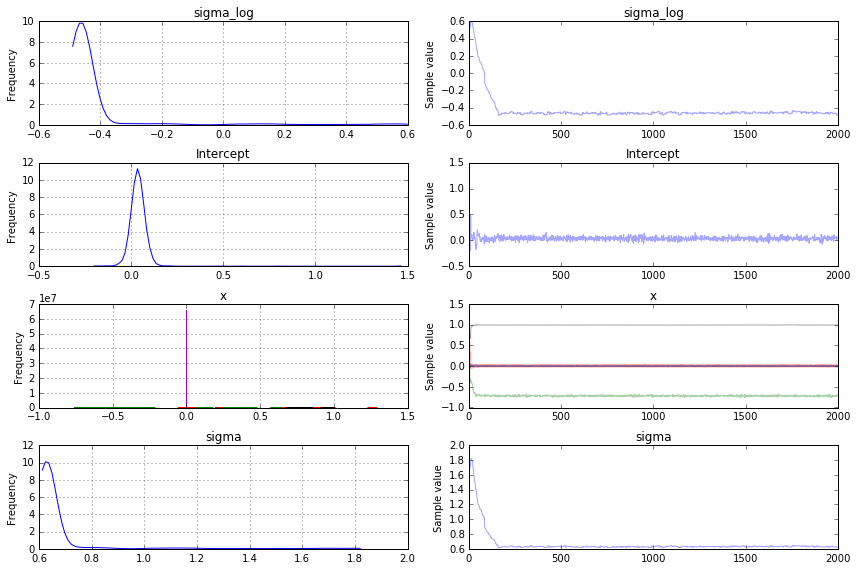

In [30]:
traceplot(trace);